# Project: Build a Traffic Sign Recognition Classifier

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle

training_file = "./data/train.p"
validation_file = "./data/valid.p"
testing_file = "./data/test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)

img_train, lbl_train = train['features'], train['labels']
img_valid, lbl_valid = valid['features'], valid['labels']
img_test, lbl_test = test['features'], test['labels']

print(type(valid))
print("training set:", img_train.shape)
print("validation set:", img_valid.shape)
print("test set:", img_test.shape)

assert( img_train.shape[0] == lbl_train.shape[0]), "Error"
assert( img_test.shape[0] == lbl_test.shape[0]), "Error"
assert( img_valid.shape[0] == lbl_valid.shape[0]), "Error"
assert( img_train.shape[1:] == (32,32,3)), "Error"
assert( img_train.shape[1:] == (32,32,3)), "Error"
assert( img_test.shape[1:] == (32,32,3)), "Error"
assert( img_valid.shape[1:] == (32,32,3)), "Error"


<class 'dict'>
training set: (34799, 32, 32, 3)
validation set: (4410, 32, 32, 3)
test set: (12630, 32, 32, 3)


---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [2]:
import numpy as np

n_train = len(img_train)
n_validation = len(img_valid)
n_test = len(img_test)
image_shape = img_train.shape[1:4]
n_classes = len(np.unique(lbl_train))
ratioTraintoValid = n_validation/(n_train+n_validation)

print("Number of training examples =", n_train)
print("Number of validation examples =", n_validation)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)
print("Ratio between valid/train =", ratioTraintoValid)

Number of training examples = 34799
Number of validation examples = 4410
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43
Ratio between valid/train = 0.11247417684715244


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

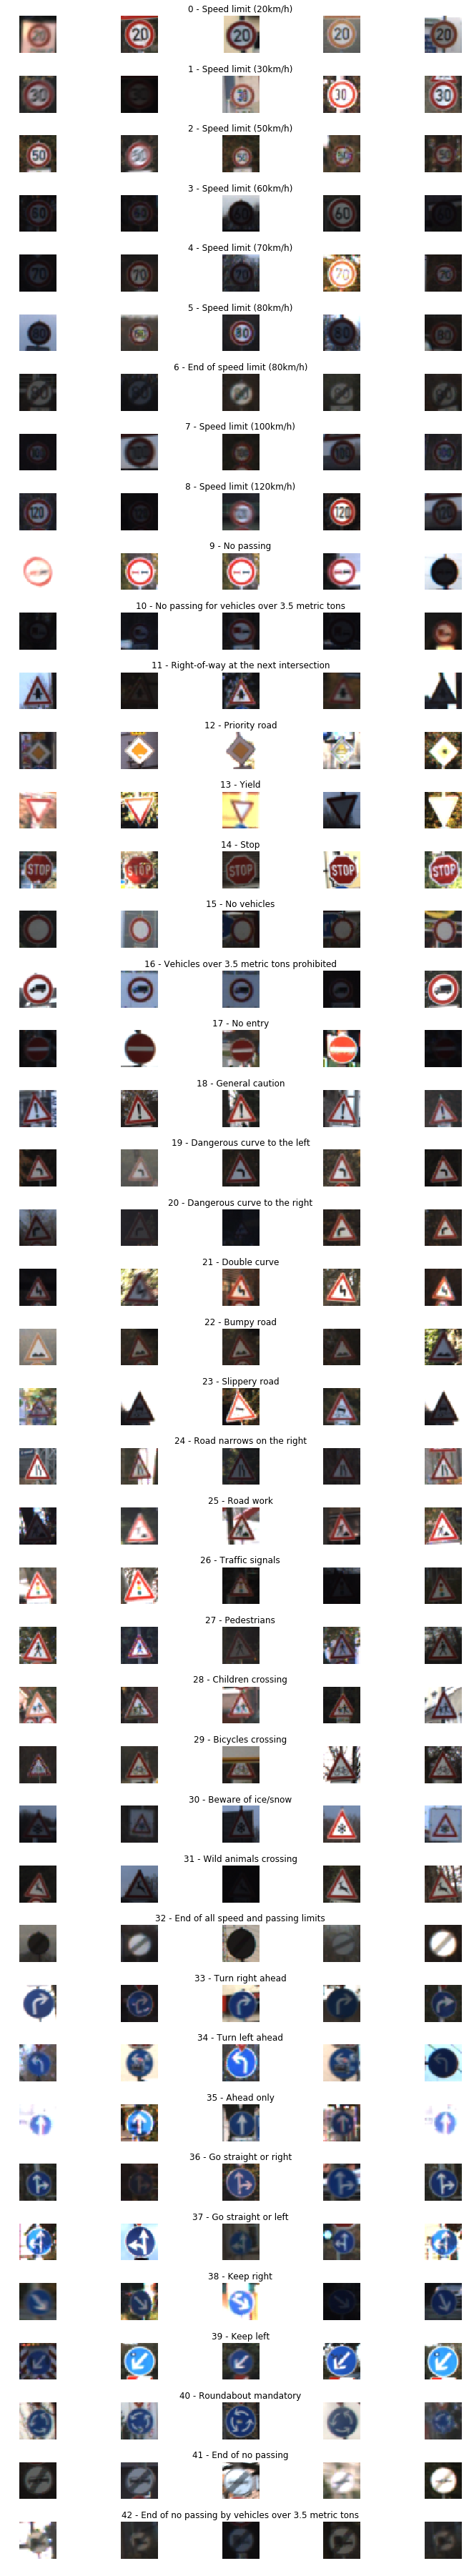

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import random

lbl_names = pd.read_csv('signnames.csv')
num_of_signs = []
classes = len(np.unique(lbl_train))
samples_per_class  = 5

fig , axis = plt.subplots( nrows = classes , ncols = samples_per_class , figsize=(10,50))
fig.tight_layout()

for i in range(samples_per_class):
    for j, row in lbl_names.iterrows():
        img = img_train[lbl_train == j]
        axis[j][i].imshow(img[random.randint(0,(len(img) - 1)), :, :], cmap=plt.get_cmap('gray'))
        axis[j][i].axis("off")
        if i == 2:
            num_of_signs.append(len(img))
            axis[j][i].set_title(str(j) + " - " + row['SignName'])

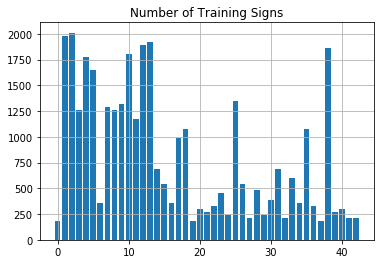

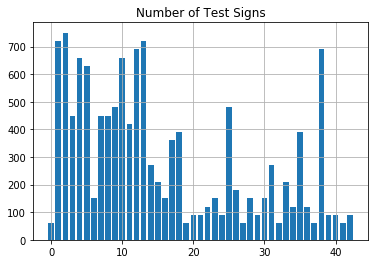

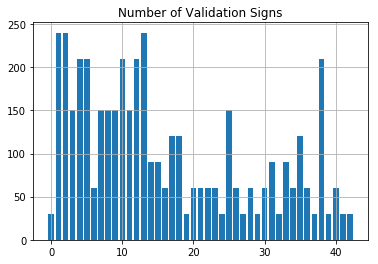

Analysis: As you can see the three datasets are evenly distrubuted in proportions. It is important to note that the number of each signs are not the same, which could play a role in classification bias


In [4]:
unique_train, num_of_signs = np.unique(lbl_train, return_counts=True)
plt.bar(unique_train, num_of_signs)
plt.grid()
plt.title("Number of Training Signs")
plt.show()

unique_test, num_of_signs = np.unique(lbl_test, return_counts=True)
plt.bar(unique_test, num_of_signs)
plt.grid()
plt.title("Number of Test Signs")
plt.show()

unique_valid, num_of_signs = np.unique(lbl_valid, return_counts=True)
plt.bar(unique_valid, num_of_signs)
plt.grid()
plt.title("Number of Validation Signs")
plt.show()

print("Analysis: As you can see the three datasets are evenly distrubuted in proportions. It is important to note that the number of each signs are not the same, which could play a role in classification bias")

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [5]:
import tensorflow as tf
import keras
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.contrib.layers import flatten
from math import ceil
from sklearn.utils import shuffle
import cv2
import time


Using TensorFlow backend.


In [6]:
def normalize(img):
    normalized_img = img/255
    return normalized_img

def cvtGrayscale(img):
    gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    return gray_img

def histogram_equalization(gray_img):
    hist_img = cv2.equalizeHist(gray_img)
    return hist_img

def preprocessing(img):
    gray_img = cvtGrayscale(img)
    histogram_eq_img = histogram_equalization(gray_img)
    normalized_img = normalize(histogram_eq_img)
    return normalized_img

#Perform preprocessing on all 3 data sets
img_prctrain = np.array(list(map(preprocessing , img_train)))
img_prctest = np.array(list(map(preprocessing , img_test)))
img_prcvalid = np.array(list(map(preprocessing , img_valid)))


In [7]:
print(img_prctrain.shape)

(34799, 32, 32)


Sample of Augmented Images
(10000, 32, 32)
Training Data Set Size Before:  (34799, 32, 32)
Training Data Set Size After:  (44799, 32, 32)


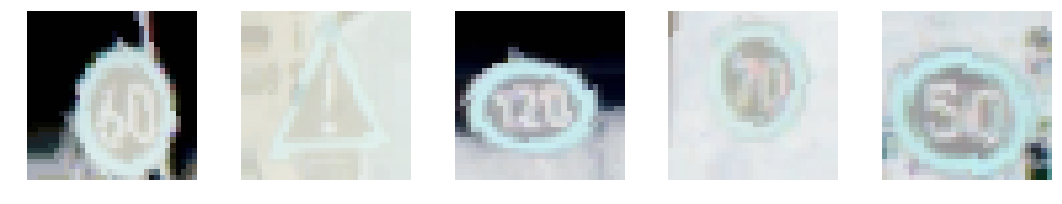

In [8]:
#Data Augmentation / Diversifying Data Set

datagen = ImageDataGenerator(width_shift_range = 0.1 ,
                       height_shift_range = 0.1, 
                       zoom_range = 0.2 , 
                       shear_range = 0.1, 
                       rotation_range = 10)

datagen.fit(img_train)
batches = datagen.flow(img_train , lbl_train , batch_size = 10000)
img_batch , lbl_batch = next(batches)

fig, axis = plt.subplots(nrows = 1 , ncols = 5 , figsize=(15,30))
plt.tight_layout()
print("Sample of Augmented Images")
for i in range(5):
    axis[i].imshow(img_batch[i], cmap ='gray')
    axis[i].axis('off')
    
    
img_batch = np.array(list(map(cvtGrayscale , img_batch)))
img_batch = np.array(list(map(normalize , img_batch)))
print(img_batch.shape)


print("Training Data Set Size Before: ", img_prctrain.shape)

img_prctrain = np.concatenate((img_prctrain, img_batch))
lbl_train = np.concatenate((lbl_train, lbl_batch))
print("Training Data Set Size After: ", img_prctrain.shape)




In [9]:
#Reshape
from sklearn.model_selection import train_test_split
img_prctrain, img_prcvalid, lbl_train, lbl_valid = train_test_split(img_prctrain, lbl_train, test_size=0.2, random_state=0)

img_prctrain = img_prctrain.reshape( 35839 , 32 , 32 , 1)
img_prctest = img_prctest.reshape( 12630 , 32 , 32 , 1)
img_prcvalid = img_prcvalid.reshape( 8960 , 32 , 32 , 1)


In [10]:
print(img_prctrain.shape)
print(img_prcvalid.shape)

n_train = len(img_prctrain)
n_validation = len(img_prcvalid)
image_shape = img_train.shape[1:4]
n_classes = len(np.unique(lbl_train))
ratioTraintoValid2 = n_validation/(n_train+n_validation)

print("Number of training examples =", n_train)
print("Number of validation examples =", n_validation)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)
print("Ratio between valid/train =", ratioTraintoValid2)

(35839, 32, 32, 1)
(8960, 32, 32, 1)
Number of training examples = 35839
Number of validation examples = 8960
Image data shape = (32, 32, 3)
Number of classes = 43
Ratio between valid/train = 0.20000446438536573


Here are samples of the final augmented images before entering the CNN


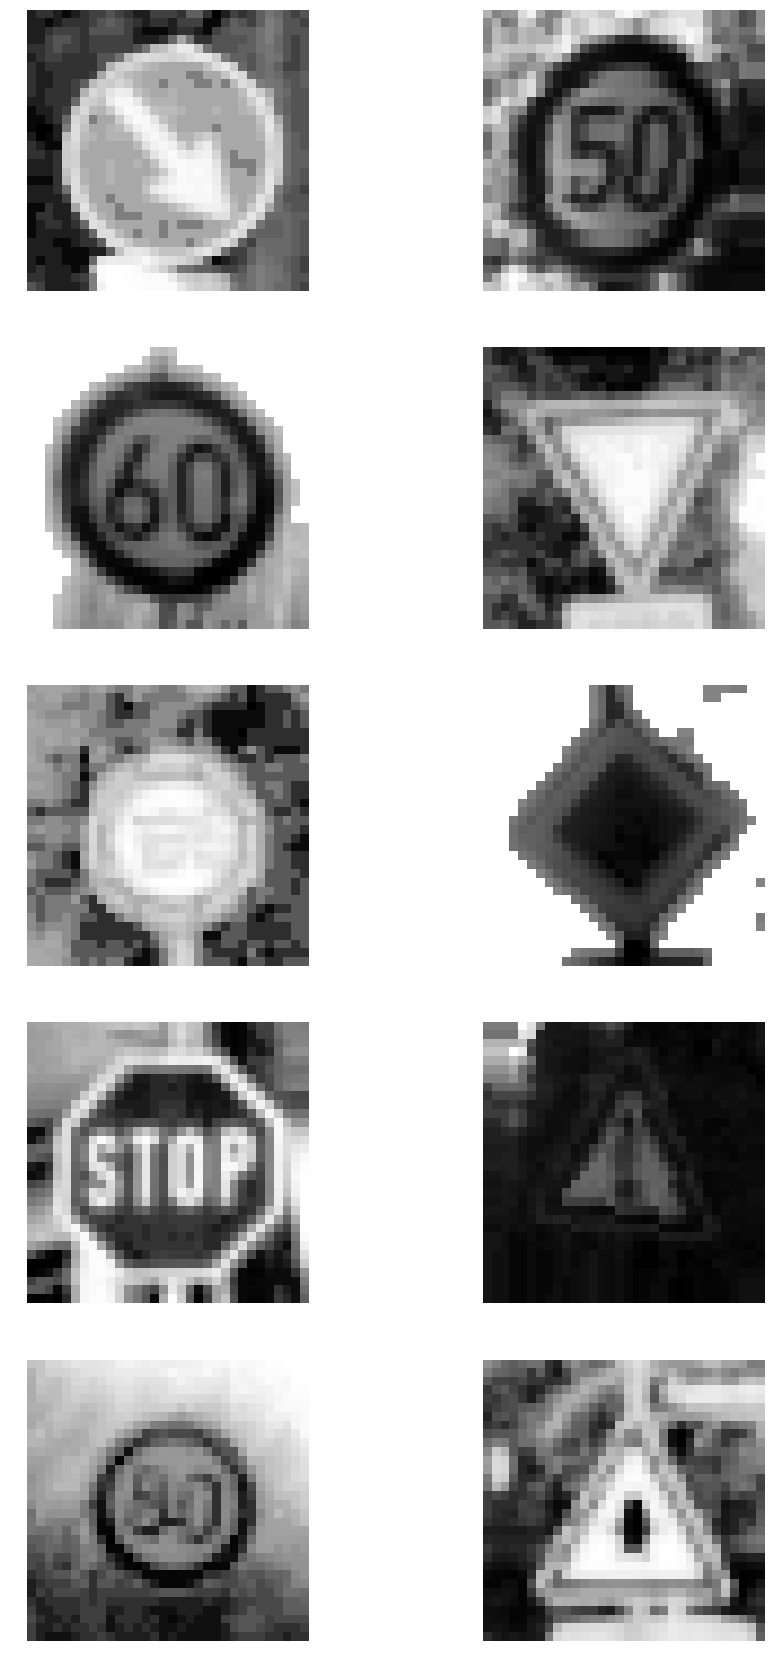

In [11]:
nrows = 5
ncols = 2
_, sample = plt.subplots(nrows = nrows, ncols = ncols, figsize=(15,30))

print("Here are samples of the final augmented images before entering the CNN")
for i in range(0,nrows):
    sample[i][0].imshow(img_prctrain[random.randint(0,img_prctrain.shape[0] -1)].squeeze(), cmap='gray')
    sample[i][1].imshow(img_prctrain[random.randint(0,img_prctrain.shape[0] -1)].squeeze(), cmap='gray')
    sample[i][0].axis("off")
    sample[i][1].axis("off")

In [12]:
#Shuffle the training data
img_prctrain, lbl_train = shuffle(img_prctrain, lbl_train)

In [13]:
#Make sure input shapes are correct
print(img_prctrain.shape)
print(img_prctest.shape)
print(img_prcvalid.shape)

(35839, 32, 32, 1)
(12630, 32, 32, 1)
(8960, 32, 32, 1)


### Model Architecture

In [14]:
### CNN Architecture
    # 1. Convolution -> Input: 32x32x1 -> Output: 28x28x60
    # 2. Relu -> Input: 28x28x60 -> Output: 28x28x60
    # 3. Convolution -> Input: 28x28x60 -> Output: 24x24x60
    # 4. Relu -> Input: 24x24x60 -> Output: 24x24x60
    # 5. Max Pooling -> Input: 24x24x60 -> Output: 12x12x60
    # 6. Convolution -> Input: 12x12x60 -> Output: 10x10x30
    # 7. Relu -> Input: 10x10x30 -> Output: 10x10x30
    # 8. Convolution -> Input: 10x10x30 -> Output: 8x8x30
    # 9. Relu -> Input: 8x8x30 -> Output: 8x8x30
    # 10. Max Pooling -> Input: 8x8x30 -> Output: 4x4x30
    
    # 11. Flatten - > Input: 4x4x30 -> Ouput: 480
    # 12. Dropout -> Input: 480 -> Ouput: 480
    # 13. Fully Connected - > Input: 480 -> Ouput: 500
    # 14. Relu -> Input: 500 -> Output: 500
    # 15. Dropout -> Input: 500 -> Ouput: 500
    # 16. Fully Connected - > Input: 500 -> Ouput: 43
    # 17. Relu -> Input: 43 -> Output: 43
    # Total params: 378,023

import tensorflow as tf

#Parameters
EPOCHS = 27
BATCH_SIZE = 128
rate = 0.00095


def LeNet(data_set):
    mu = 0
    sigma = 0.1
    keep_prob = 0.5
    
  #Note shape = (Kernal Height, Kernal Width, Input Depth, Output Depth)
    
    #Layer: 1&2  
    conv1_W = tf.Variable(tf.truncated_normal(shape =(5,5,1,60), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(60))
    conv1 = tf.nn.conv2d(data_set, conv1_W, strides = [1,1,1,1] , padding = 'VALID') + conv1_b
    conv1 = tf.nn.relu(conv1)
    print(conv1.shape)
    
    #Layer: 2&3
    conv2_W = tf.Variable(tf.truncated_normal(shape =(5,5,60,60), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(60))
    conv2 = tf.nn.conv2d(conv1, conv2_W, strides = [1,1,1,1] , padding = 'VALID') + conv2_b
    conv2 = tf.nn.relu(conv2)
    print(conv2.shape)

    #Layer: 5
    conv2 = tf.nn.max_pool(conv2, ksize = [1,2,2,1] , strides = [1,2,2,1], padding = 'VALID')
    print(conv2.shape)
    
    #Layer: 6&7
    conv3_W = tf.Variable(tf.truncated_normal(shape =(3,3,60,30), mean = mu, stddev = sigma))
    conv3_b = tf.Variable(tf.zeros(30))
    conv3 = tf.nn.conv2d(conv2, conv3_W, strides = [1,1,1,1] , padding = 'VALID') + conv3_b
    conv3 = tf.nn.relu(conv3) 
    print(conv3.shape)
    
    #Layer: 8&9
    conv4_W = tf.Variable(tf.truncated_normal(shape =(3,3,30,30), mean = mu, stddev = sigma))
    conv4_b = tf.Variable(tf.zeros(30))
    conv4 = tf.nn.conv2d(conv3, conv4_W, strides = [1,1,1,1] , padding = 'VALID') + conv4_b
    conv4 = tf.nn.relu(conv4)
    print(conv4.shape)
    
    #Layer: 10
    conv4 = tf.nn.max_pool(conv4, ksize = [1,2,2,1] , strides = [1,2,2,1], padding = 'VALID')
    print(conv4.shape)
    
    #Layer: 11&12
    flat_layer = flatten(conv4)
    dropout1 = tf.nn.dropout(flat_layer,keep_prob)
    
    #Layer: 13&14
    fc1_W = tf.Variable(tf.truncated_normal(shape =(480,180), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(180))
    fc1 = tf.matmul(dropout1, fc1_W) + fc1_b
    fc1 = tf.nn.relu(fc1) 
    
    #Layer 15
    dropout2 = tf.nn.dropout(fc1,keep_prob)
    
    #Layer: 16&17
    fc2_W = tf.Variable(tf.truncated_normal(shape =(180,43), mean = mu, stddev = sigma))
    fc2_b = tf.Variable(tf.zeros(43))
    Logits = tf.matmul(dropout2, fc2_W) + fc2_b

    return Logits  

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [15]:
#Training Setup

x_input = tf.placeholder(tf.float32,(None,32,32,1))
y_output = tf.placeholder(tf.int32, (None) )
one_hot_y = tf.one_hot(y_output,43)

Logits = LeNet(x_input)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels = one_hot_y, logits = Logits)
loss_operation = tf.reduce_mean(cross_entropy) 
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)
prediction_step = tf.equal(tf.argmax(Logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(prediction_step, tf.float32))


(?, 28, 28, 60)
(?, 24, 24, 60)
(?, 12, 12, 60)
(?, 10, 10, 30)
(?, 8, 8, 30)
(?, 4, 4, 30)


In [16]:
#Evaluate Accuracy Function
def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x_input: batch_x, y_output: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

In [17]:
saver = tf.train.Saver()
model_file = './model'

In [41]:
# Starts training
def train(X_data, y_data):
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        num_examples = len(X_data)

        print("Training...")
        print()
        validation_accuracy_data = []
        test_accuracy_data = []
        for i in range(EPOCHS):
            X_data, y_data = shuffle(X_data, y_data)
            for offset in range(0, num_examples, BATCH_SIZE):
                end = offset + BATCH_SIZE
                batch_x, batch_y = X_data[offset:end], y_data[offset:end]
                sess.run(training_operation, feed_dict={x_input: batch_x, y_output: batch_y})

            test_accuracy = evaluate(img_prctest, lbl_test)
            test_accuracy_data.append(test_accuracy)
            validation_accuracy = evaluate(img_prcvalid, lbl_valid)
            validation_accuracy_data.append(validation_accuracy)
            print("EPOCH {} ...".format(i+1))
            print("Validation Accuracy = {:.3f}".format(validation_accuracy))
            print()

        saver.save(sess, './lenet')
        print("Model saved")
        return test_accuracy_data, validation_accuracy_data

In [42]:
test_accuracy_data, validation_accuracy_data = train(img_prctrain, lbl_train)

Training...

EPOCH 1 ...
Validation Accuracy = 0.471

EPOCH 2 ...
Validation Accuracy = 0.682

EPOCH 3 ...
Validation Accuracy = 0.773

EPOCH 4 ...
Validation Accuracy = 0.825

EPOCH 5 ...
Validation Accuracy = 0.854

EPOCH 6 ...
Validation Accuracy = 0.869

EPOCH 7 ...
Validation Accuracy = 0.895

EPOCH 8 ...
Validation Accuracy = 0.898

EPOCH 9 ...
Validation Accuracy = 0.910

EPOCH 10 ...
Validation Accuracy = 0.914

EPOCH 11 ...
Validation Accuracy = 0.924

EPOCH 12 ...
Validation Accuracy = 0.926

EPOCH 13 ...
Validation Accuracy = 0.930

EPOCH 14 ...
Validation Accuracy = 0.938

EPOCH 15 ...
Validation Accuracy = 0.936

EPOCH 16 ...
Validation Accuracy = 0.940

EPOCH 17 ...
Validation Accuracy = 0.947

EPOCH 18 ...
Validation Accuracy = 0.950

EPOCH 19 ...
Validation Accuracy = 0.952

EPOCH 20 ...
Validation Accuracy = 0.944

EPOCH 21 ...
Validation Accuracy = 0.951

EPOCH 22 ...
Validation Accuracy = 0.956

EPOCH 23 ...
Validation Accuracy = 0.946

EPOCH 24 ...
Validation Accura

In [43]:
#Evaluate Model

#1. Validation Data
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(img_prcvalid, lbl_valid)
    print("Validation Accuracy = {:.3f}".format(test_accuracy))

#2. Test Data
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    acc = evaluate(img_prctest, lbl_test)
    print("Test Accuracy : ", acc)

INFO:tensorflow:Restoring parameters from ./lenet
Validation Accuracy = 0.956
INFO:tensorflow:Restoring parameters from ./lenet
Test Accuracy :  0.947505938016


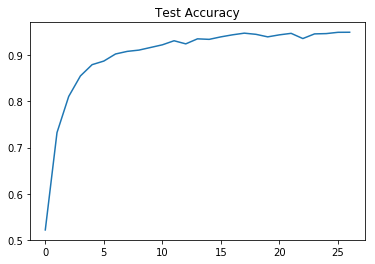

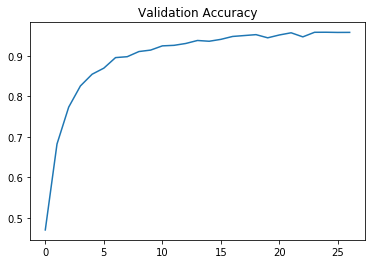

In [44]:
plt.plot(test_accuracy_data)
plt.title("Test Accuracy")
plt.show()

plt.plot(validation_accuracy_data)
plt.title("Validation Accuracy")
plt.show()

---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

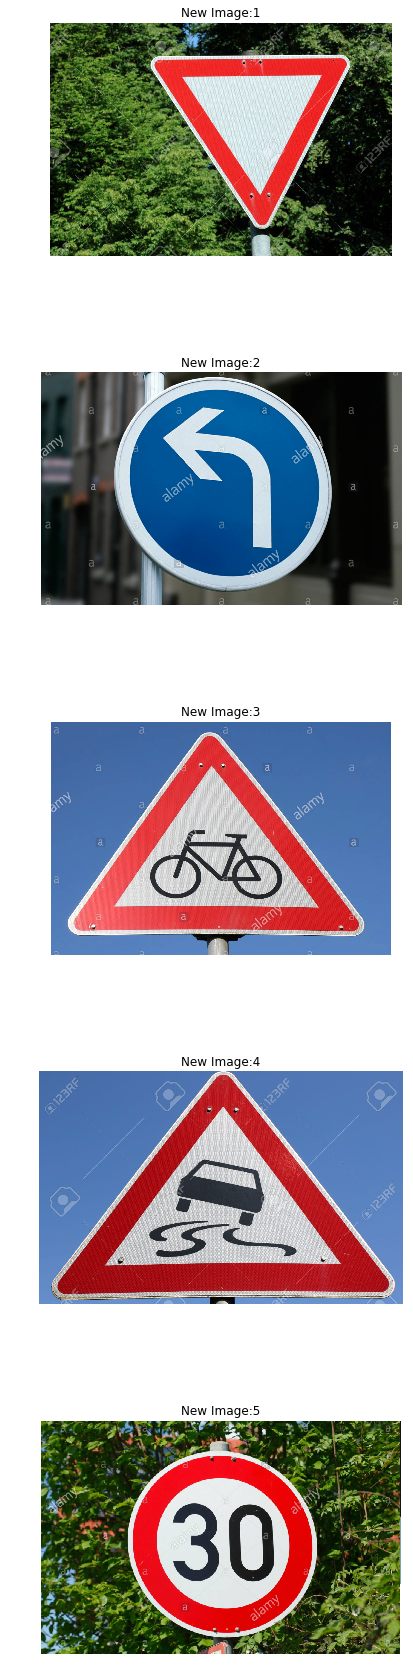

In [45]:
import glob
test_imgs = glob.glob('Additional-German-Traffic-Signs/*')


#Display Image
fig, axis = plt.subplots(nrows = len(test_imgs) , ncols = 1 , figsize = (10,30))
count = 0
fig.subplots_adjust(hspace=0.5)

for image in test_imgs:
    img = cv2.imread(image)
    #Convert to RGB 
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    axis[count].imshow(img)
    axis[count].set_title("New Image:" + str(count+1))
    axis[count].axis("off")
    count = count + 1

test_labels = [13,34,29,23,1]
    

### Predict the Sign Type for Each Image

In [46]:
def runthroughNetwork(img):
    img = cv2.imread(img)
    img = preprocessing(img)
    img = cv2.resize(img, (32,32))
    img = np.array(img, dtype = np.float32)
    img = img.reshape(32,32,1)
    return img

def predict(images, human_readable=False):
    with tf.Session() as sess:
        saver.restore(sess, tf.train.latest_checkpoint('.'))
        results = sess.run(tf.argmax(Logits, 1), {x_input : images})
        if human_readable:
            results = [signname[n] for n in results]
        return results


def scoreAccuracy(result):
    count = 0
    for i in range(0,len(result)):
        if result[i] == answer[i]:
            count = count + 1
    accuracy = count/len(result)
    return accuracy


answer = ['Yield','Turn left ahead','Bicycles crossing','Slippery road','Speed limit (30km/h)']
scores = np.array(list(map(runthroughNetwork , test_imgs)))




In [47]:
import csv
signname = {}
with open('signnames.csv', 'r') as f:
    reader = csv.reader(f)
    for r in reader:
        if r[0].isdigit():
            signname[int(r[0])] = r[1]


### Analyze Performance

In [48]:
result = predict(scores,True)
print(result)
accuracy = scoreAccuracy(result)
print("Accuracy is: ", accuracy*100 , "%")

INFO:tensorflow:Restoring parameters from ./lenet
['Yield', 'Turn left ahead', 'Bicycles crossing', 'Slippery road', 'Speed limit (30km/h)']
Accuracy is:  100.0 %


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.


INFO:tensorflow:Restoring parameters from ./lenet


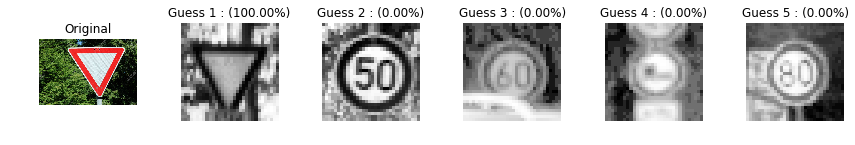

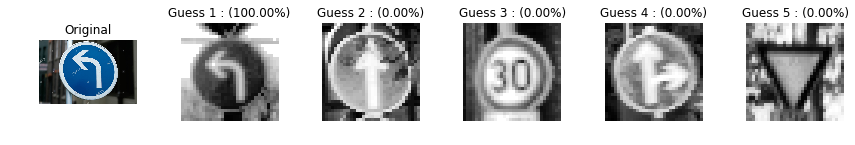

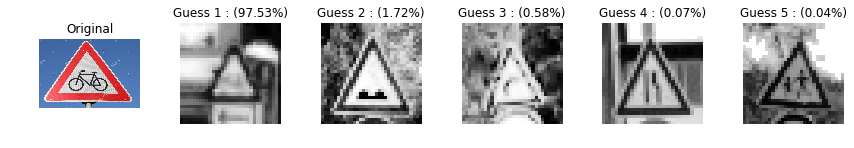

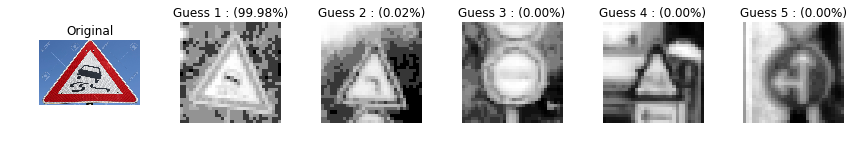

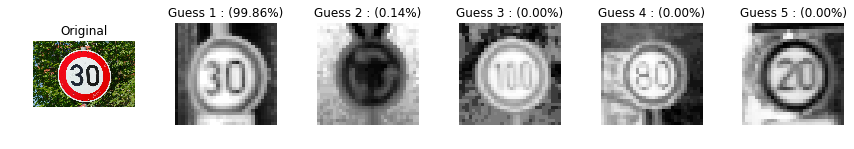

In [52]:
with tf.Session() as sess:
    k_size = 5
    softmax_logits = tf.nn.softmax(Logits)
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    my_softmax_logits = sess.run(softmax_logits, feed_dict={x_input: scores})
    my_top_k = sess.run(tf.nn.top_k(softmax_logits, k=k_size), {x_input : scores})

    my_imgs = []
    count = 0
    for image in test_imgs:
        img = cv2.imread(image)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        my_imgs.append(img)
        count = count + 1
        
    
    for i in range(5):
        figures = {}
        labels = {}
        
        figures[0] = my_imgs[i]
        labels[0] = "Original"
        
        for j in range(k_size):
            labels[j+1] = 'Guess {} : ({:.2f}%)'.format(j+1, 100*my_top_k[0][i][j])
            figures[j+1] = img_prctest[np.argwhere(lbl_test == my_top_k[1][i][j])[0]].squeeze()
            
        fig, axs = plt.subplots(ncols=6, nrows= 1, figsize=(12, 14))
        axs = axs.ravel()
        for index, title in zip(range(len(figures)), figures):
            axs[index].imshow(figures[title], plt.gray())
            if(labels != None):
                axs[index].set_title(labels[index])
            else:
                axs[index].set_title(title)
        
            axs[index].set_axis_off()
        
        plt.tight_layout()